In [1]:
import os,codecs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras import Sequential
from keras.layers import MaxPooling2D
import keras
import cv2
%matplotlib inline
from keras.callbacks import TensorBoard

In [3]:
files=os.listdir('../MinorProject/data')

In [4]:
# FUNCTION TO CONVERT TO INT
def get_int(data):
    return int(codecs.encode(data,'hex'),16)

In [5]:
#Reading Data into dictionary
dataset=dict()
path='../MinorProject/data/'                                            #Creating PATH
for file in files:                                                      #READING FILE ONE BY ONE
    path1=path+file                                                     #FILE PATH FOR CURRENT FILE
    print('Reading',path1)
    with open(path1,'rb') as f:                                         #OPENING FILE
        data=f.read()                                                   #READING FILE INTO DATA
        type=get_int(data[0:4])                                         #GETTING MAGIC NUMBER
        length=get_int(data[4:8])                                       #LENGTH OF DATA
        if type==2051:                                                  # IF FILE IS IMAGE SET
            category='images'
            rows=get_int(data[8:12])                                    #GETTING NUMBER OF ROWS
            cols=get_int(data[12:16])                                   #GETTING NUMBER OF COLUMNS
            parsed=np.frombuffer(data,dtype=np.uint8,offset=16)
            parsed=parsed.reshape(length,rows,cols)
        elif type==2049:                                                #IF FILE IS LABEL SET
            category='labels'
            parsed=np.frombuffer(data,dtype=np.uint8,offset=8)
            parsed=parsed.reshape(length)
        if length==60000:
            prefix='train_'
        else:
            prefix='test_'
        dataset[prefix+category]=parsed
print('READING COMPLETE')

Reading ../MinorProject/data/t10k-images.idx3-ubyte
Reading ../MinorProject/data/t10k-labels.idx1-ubyte
Reading ../MinorProject/data/train-images.idx3-ubyte
Reading ../MinorProject/data/train-labels.idx1-ubyte
READING COMPLETE


In [6]:
# CREATING REQUIRED VARIABLES
train_set=dataset['train_images']
train_label=to_categorical(dataset['train_labels'])
test_set=dataset['test_images']
test_label=to_categorical(dataset['test_labels'])
train_set=train_set.reshape(60000,28,28,1)
test_set=test_set.reshape(10000,28,28,1)

In [7]:
##ataset['train_images'].shape

In [8]:
##plt.imshow(train_set[1],cmap='gray')

In [9]:
##files=os.chdir('../MinorProject/train_image')

In [10]:
##np.savetxt("train_labels.csv",train_label, delimiter=",")

In [11]:
## np.savetxt("test_labels.csv",test_label, delimiter=",")

In [12]:
##for i in range((dataset['train_images'].shape)[0]):
   ## image_index=str(i)+".jpeg"
   ## cv2.imwrite(image_index,train_set[i])

In [13]:
# CREATING MODEL
model=Sequential()
model.add(Conv2D(32,activation='relu',kernel_size=3,padding='same',data_format="channels_last",input_shape=(28,28,1)))

In [14]:
model.add(Conv2D(32,activation='relu',padding='same',kernel_size=3))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Conv2D(32,activation='relu',padding='same',kernel_size=5))

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))

In [18]:
model.add(Conv2D(64,activation='relu',padding='same',kernel_size=3))

In [19]:
model.add(Conv2D(64,activation='relu',padding='same',kernel_size=3))

In [20]:
model.add(Dropout(0.4))

In [21]:
model.add(Conv2D(64,activation='relu',padding='same',kernel_size=5))

In [22]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))

In [23]:
model.add(Conv2D(128,activation='relu',padding='same',kernel_size=3))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(128,activation='relu'))

In [26]:
model.add(Dense(64,activation='relu'))

In [27]:
model.add(Dense(10,activation='softmax'))

In [28]:
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime

In [30]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [31]:
history=model.fit(train_set,train_label,validation_split=0.2,epochs=10,batch_size=1000,callbacks = [TensorBoard(log_dir = log_dir,
histogram_freq = 50)])

Epoch 1/10
 1/48 [..............................] - ETA: 0s - loss: 3.1079 - accuracy: 0.1100WARNING:tensorflow:From C:\Users\omii_codes\.conda\envs\MinorProjectEnv\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
48/48 [==============================] - 140s 3s/step - loss: 1.8296 - accuracy: 0.4056 - val_loss: 0.3701 - val_accuracy: 0.8972
Epoch 2/10
48/48 [==============================] - 143s 3s/step - loss: 0.2252 - accuracy: 0.9291 - val_loss: 0.0991 - val_accuracy: 0.9711
Epoch 3/10
48/48 [==============================] - 146s 3s/step - loss: 0.0952 - accuracy: 0.9707 - val_loss: 0.0745 - val_accuracy: 0.9771
Epoch 4/10
48/48 [==============================] - 140s 3s/step - loss: 0.0691 - accuracy: 0.9785 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 5/10
48/48 [==============================]

In [32]:
model.evaluate(test_set,test_label)

313/313 [==============================] - 7s 23ms/step - loss: 0.0245 - accuracy: 0.9922


[0.02451198361814022, 0.9922000169754028]

In [33]:
model.save('my_model.h5')

In [34]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        3

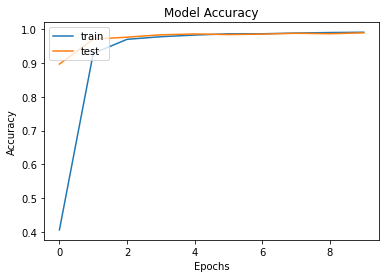

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

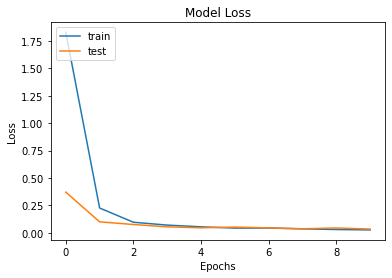

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#%tensorboard --logdir logs/fit